In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #data splitting and normalization 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #for building and training the neural network




In [ ]:
# Generate training samples in the range [-15, 15].
X = np.linspace(-15, 15, 1000).reshape(-1, 1)

# Polynomial function: y = 7x^4 - 4x^3 - x + 6
y = 7*X**4 - 4*X**3 - X + 6

# Normalize the data (both inputs x and outputs y) in the range [-1, 1].
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
#prepares data for training.

In [4]:
# Split into training (80%), validation (10%), and test (10%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42)  # ~10% of total

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")


Training samples: 800, Validation samples: 100, Test samples: 100


In [ ]:
# Create the model
#Input layer → 32 neurons → 64 neurons → 128 neurons → 1 output(3 hidden layers and 1 output layer)
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),#Rectified Linear Unit
    Dense(128, activation='relu'),#128 neurons, each applying ReLU to their output.
    Dense(1)  # Output layer for regression
])

# Compile the model and configure the training process
model.compile(optimizer='adam', loss='mean_squared_error')
#Adam (Adaptive Moment Estimation) is a powerful optimization algorithm. Adjust the learning rate mean and variance
# Show the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Trains the model on the training data.
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), #validation set
                    epochs=100, 
                    batch_size=32,
                    verbose=1)
#Stores training history (losses, etc.) in history.

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 0.4678 - val_loss: 0.3743
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2668 - val_loss: 0.1689
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0930 - val_loss: 0.0603
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0312
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0210 - val_loss: 0.0146
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.0086
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11

4/4 [==============================] - 0s 4ms/step


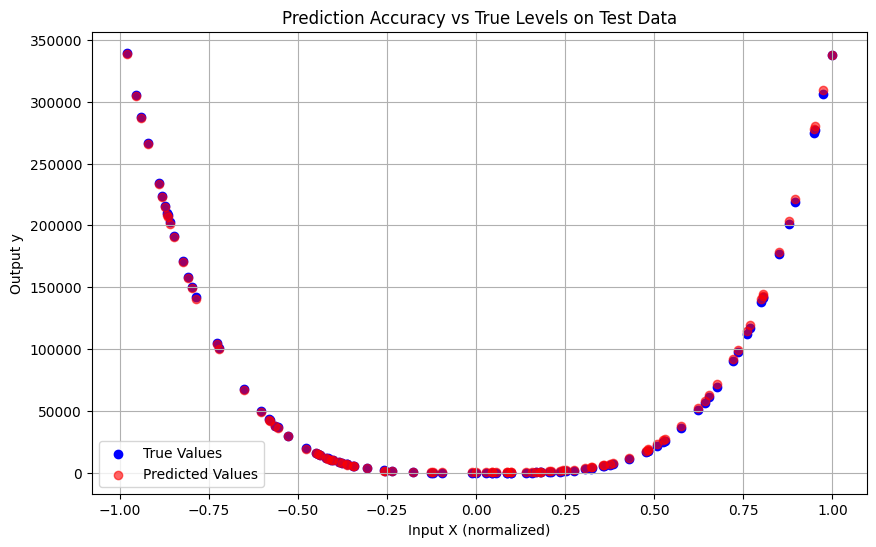

In [ ]:
#After training, use the test data to make predictions.
# Predict on test data
#Converts scaled predictions and actual values back to original range.
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Plot true vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test_inv, color='blue', label='True Values')
plt.scatter(X_test, y_pred_inv, color='red', label='Predicted Values', alpha=0.6)
plt.title('Prediction Accuracy vs True Levels on Test Data')
plt.xlabel('Input X (normalized)')
plt.ylabel('Output y')
plt.legend()
plt.grid(True)
plt.show()
#A plot showing how close the predicted values are to the actual ones. Ideally, the red dots will overlap or closely follow the blue ones.